# Eigenvalue experiment
- Seeing how the algorithm converges to eigenvalues 
- We take a 2-qubit unitary and try to run both the **original** method and the **modified** method with resolution = 30, error = 2.
- We want to know how the algorithms converge to same eigenvalues or not as we perform many experiments

In [12]:
from qiskit import *
import matplotlib.pyplot as plt
import random
from scipy.stats import unitary_group
import os
import seaborn as sns
import numpy as np

In [13]:
from normal_SPEA import SPEA
from changed_SPEA import global_max_SPEA

### Defining the unitary matrix

In [136]:
unit = unitary_group.rvs(8)
unit

array([[-0.3365954 +0.25511356j, -0.30519005+0.26436159j,
        -0.05313995+0.10562689j,  0.01142003+0.38871631j,
        -0.36941642+0.34826355j,  0.04549871+0.12758636j,
         0.07560725-0.44901325j, -0.05120044+0.0855901j ],
       [ 0.21909872+0.07788799j, -0.44041106+0.08440421j,
         0.44435228-0.44162606j,  0.10963717-0.11800285j,
        -0.01878754+0.17431379j, -0.24090555-0.06859046j,
         0.25072898+0.05552734j,  0.39209902-0.11509726j],
       [ 0.04750095+0.174278j  ,  0.08943216+0.28869665j,
        -0.0763437 +0.26787123j, -0.16616465+0.23065424j,
        -0.03408972-0.47984199j, -0.00957612+0.02598249j,
        -0.04706497-0.0177643j ,  0.6688332 -0.18864195j],
       [-0.17890146-0.33379395j, -0.18068397+0.46036813j,
         0.26280768-0.10434463j,  0.12473505-0.12321758j,
        -0.249871  -0.221087j  ,  0.35005072+0.20192075j,
        -0.32382693+0.29309199j, -0.06901447+0.17646815j],
       [ 0.2887628 -0.49039191j,  0.09120277-0.10163855j,
        -0

### Generate the eigenvalues

In [137]:
# get the eigenvalues and eigenstates
eig_v, eig_vect = np.linalg.eig(unit)
eig_v = np.angle(eig_v)
eig = []
for k in eig_v:
    if k < 0:
        e = (k+2*np.pi)/(2*np.pi)
    else:
        e = (k)/(2*np.pi)
    eig.append(e)
eig_v = np.array(eig)
print("Eigenvalues :", eig_v)
print("Eigenstates :", eig_vect)

Eigenvalues : [0.98666312 0.79637378 0.69182778 0.53458156 0.46446207 0.36737463
 0.2192769  0.17859173]
Eigenstates : [[-0.21147302+0.13705391j  0.12011102-0.09236254j  0.35372693+0.15336459j
  -0.22617692+0.03189971j  0.57147277+0.j         -0.2678514 +0.01710738j
   0.54451929+0.j          0.03414768-0.12820056j]
 [ 0.00261967-0.19182287j  0.10233182+0.32203912j -0.10761433+0.01599987j
   0.633079  +0.j          0.27061229+0.27424252j -0.1440755 +0.18672922j
  -0.02662895-0.36783991j  0.08581585-0.29823663j]
 [ 0.15314391+0.02639847j  0.16193168+0.38142564j -0.16461067-0.17289424j
  -0.27369677-0.22844173j  0.10567735-0.10307823j  0.45474208+0.03176707j
   0.21267497-0.10575751j  0.57797095+0.j        ]
 [ 0.66289076+0.j         -0.04559177-0.25652586j  0.27377405-0.13459945j
   0.0385697 -0.46736996j -0.08717579+0.2359607j  -0.10033803-0.21783121j
   0.15039313-0.13375334j -0.05320804-0.12476296j]
 [ 0.00208464+0.43922107j  0.07067014+0.29686654j -0.13616353+0.17352306j
  -0.331294

### Generate the basis we provide

In [145]:
sample = unitary_group.rvs(8)
basis = []
for k in sample:
    basis.append(k)
basis_ind = np.random.choice(range(8))
print("Basis :", basis)
print("Basis index :", basis_ind)

Basis : [array([-0.05031754-0.17386175j, -0.12380882+0.2578681j ,
       -0.17365861+0.18672819j, -0.0086655 -0.27783302j,
        0.17719931+0.403233j  ,  0.32478246-0.07228774j,
       -0.47064668-0.19748711j, -0.40213451+0.1272691j ]), array([-0.16306338+0.22602941j, -0.49082383+0.04816616j,
        0.0160578 -0.26434974j,  0.22755532+0.0777652j ,
        0.25059432+0.28615236j, -0.38538064-0.42142914j,
        0.04915828+0.15913249j, -0.11941134-0.1957686j ]), array([-0.16552437+0.32956413j, -0.32582288+0.01105057j,
       -0.1367008 +0.03088912j,  0.43747326+0.19580823j,
        0.02522323-0.3566076j ,  0.37989272+0.26580592j,
       -0.30879678+0.22055571j,  0.11054757+0.0966646j ]), array([ 0.20818388+0.1491209j ,  0.02542012-0.03095645j,
        0.13790483+0.70793428j,  0.25626793+0.23636868j,
       -0.15056879+0.15589943j, -0.39597835-0.03314201j,
       -0.22917809-0.14931478j,  0.10532395+0.01738934j]), array([ 0.27642382+0.26740624j, -0.37573375+0.09348379j,
        0.3916

### Utils

In [17]:
def generate_plot1(actual_E, returned_E, experiments):
    colors = ['blue', 'orange', 'red',
              'green', 'brown', 'magenta', 'pink']

    plt.figure(figsize=(9, 7))
    plt.scatter(range(experiments), returned_E, marker='o', edgecolors='grey', color=np.random.choice(colors),
                alpha=0.8,)
    for i, k in enumerate(actual_E):
        if i == 0:
            plt.plot([0, experiments], [k, k], color='black',
                     linewidth=2, label='Actual Values')
        else:
            plt.plot([0, experiments], [k, k], color='black',
                     linewidth=2)
    plt.xlabel("Experiment Number", fontsize=14)
    plt.ylabel("Eigenvalues", fontsize=14)
    plt.title("Scatter plot for returned eigenvalues", fontsize=17)
    plt.legend()
    plt.grid()

In [18]:
def generate_plot2(actual_E, returned_E, size, experiments):
    colors = ['blue', 'orange', 'red',
              'green', 'brown', 'magenta', 'pink']

    fig = plt.figure(figsize=(16, 13))
    for i in range(size):
        ax = fig.add_subplot(size/2, 2, i+1)

        ax.scatter(range(experiments), returned_E[i], marker='o', edgecolors='grey', color=np.random.choice(colors),
                   alpha=0.8,)
        for i, k in enumerate(actual_E):
            if i == 0:
                ax.plot([0, experiments], [k, k], color='black',
                        linewidth=2, label='Actual Values')
            else:
                ax.plot([0, experiments], [k, k], color='black',
                        linewidth=2)
        ax.set_xlabel("Experiment Number", fontsize=14)
        ax.set_ylabel("Eigenvalues", fontsize=14)
        ax.set_title("Scatter plot for returned eigenvalues", fontsize=17)
        ax.legend(loc='best')
        ax.grid()

## Keeping  everything constant and running the algorithm
- Let us try to test the new parameters of *theta_min* and *theta_max* to constrain the values
- The basis vectors provided are the same and generated before hand

### Non-computational basis
- Giving a fixed non-computational basis state for the testing of the algorithm

- Algorithm 1

In [146]:
spea1 = SPEA(unit, resolution=40, error=2, max_iters=15)
simulator = Aer.get_backend('qasm_simulator')

In [147]:
eigen_vals_ret1 = []
while len(eigen_vals_ret1) != 100:
    res = spea1.get_eigen_pair(
        backend=simulator, algo='alternate', basis=basis,
        basis_ind=basis_ind)
    if res['cost'] < 0.75:
        continue

    eigen_vals_ret1.append(res['theta'])

Maximum iterations reached for the estimation.
Terminating algorithm...
Maximum iterations reached for the estimation.
Terminating algorithm...
Maximum iterations reached for the estimation.
Terminating algorithm...
Maximum iterations reached for the estimation.
Terminating algorithm...
Maximum iterations reached for the estimation.
Terminating algorithm...
Maximum iterations reached for the estimation.
Terminating algorithm...
Maximum iterations reached for the estimation.
Terminating algorithm...
Maximum iterations reached for the estimation.
Terminating algorithm...
Maximum iterations reached for the estimation.
Terminating algorithm...
Maximum iterations reached for the estimation.
Terminating algorithm...
Maximum iterations reached for the estimation.
Terminating algorithm...
Maximum iterations reached for the estimation.
Terminating algorithm...
Maximum iterations reached for the estimation.
Terminating algorithm...
Maximum iterations reached for the estimation.
Terminating algor

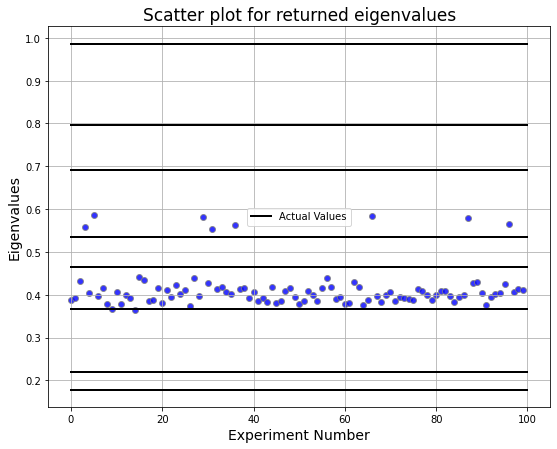

In [149]:
generate_plot1(eig_v, eigen_vals_ret1, 100)

- Algorithm 2

In [150]:
spea2 = global_max_SPEA(unit, resolution=40, error=2, max_iters=15)
simulator = Aer.get_backend('qasm_simulator')

In [151]:
eigen_vals_ret2 = []
while len(eigen_vals_ret2) != 100:
    res = spea2.get_eigen_pair(
        backend=simulator, algo='alternate', basis=basis,
        basis_ind=basis_ind)
    if res['cost'] < 0.75:
        continue
    print(res)
    eigen_vals_ret2.append(res['theta'])

Maximum iterations reached for the estimation.
Terminating algorithm...
{'cost': 0.9296875, 'theta': 0.43369391025641024, 'state': array([ 0.21820735+0.32401787j, -0.55965138+0.09410322j,
        0.40720212+0.31416847j, -0.14899223+0.24320683j,
        0.17659898+0.04992835j, -0.04495746-0.16614357j,
        0.18480251-0.26682467j, -0.06859972+0.07817319j])}
Maximum iterations reached for the estimation.
Terminating algorithm...
{'cost': 0.908203125, 'theta': 0.38902243589743585, 'state': array([ 0.177834  +0.13085468j, -0.398723  +0.00311875j,
        0.37530032+0.1928559j , -0.32852735+0.19091918j,
        0.17450589+0.14436368j,  0.51365788-0.15534033j,
        0.09236655-0.28686843j, -0.16300046+0.11478605j])}
Maximum iterations reached for the estimation.
Terminating algorithm...
{'cost': 0.908203125, 'theta': 0.4018429487179487, 'state': array([ 0.17481018+0.20369536j, -0.38667287+0.15604242j,
        0.35623593+0.18775203j, -0.36543241+0.17612668j,
        0.19999359+0.15321801j

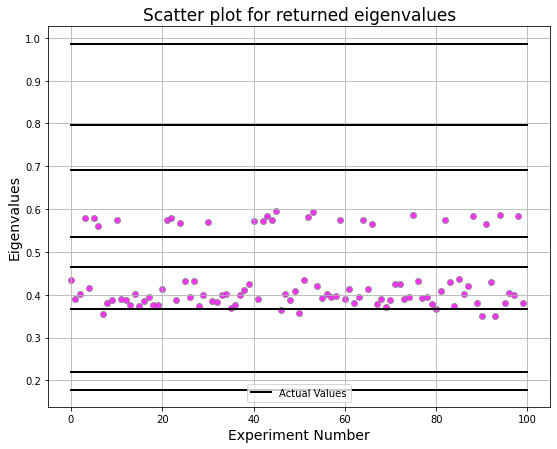

In [152]:
generate_plot1(eig_v, eigen_vals_ret2, 100)

### Computational basis
- Testing the algorithm for computational basis by specifying different basis indices
- Aim is to see whether each basis index **converges to different states** or not
- Can we infer that one of the predictions is almost always centered around the minimum eigenvalue of the matrix ?

In [ ]:
unit = unitary_group.rvs(4)
# get the eigenvalues and eigenstates
eig_v, eig_vect = np.linalg.eig(unit)
eig_v = np.angle(eig_v)
eig = []
for k in eig_v:
    if k < 0:
        e = (k+2*np.pi)/(2*np.pi)
    else:
        e = (k)/(2*np.pi)
    eig.append(e)
eig_v = np.array(eig)
print(eig_v)

In [60]:
i = np.identity(4)
basis = []
for k in i:
    basis.append(k)

In [88]:
eig_ret = []

spea1 = SPEA(unit, resolution=30, error=2, max_iters=10)
simulator = Aer.get_backend('qasm_simulator')

for i in range(4):
    basis_index = i
    eigen_vals_ret1 = []
    while len(eigen_vals_ret1) != 40:
        res = spea1.get_eigen_pair(
            backend=simulator, algo='alternate', basis=basis, basis_ind=basis_index)
        if res['cost'] < 0.75:
            continue
        print((len(eigen_vals_ret1)/40)*100, "% done...")
        eigen_vals_ret1.append(res['theta'])
    eig_ret.append(eigen_vals_ret1)

Maximum iterations reached for the estimation.
Terminating algorithm...
0.0 % done...
Maximum iterations reached for the estimation.
Terminating algorithm...
2.5 % done...
Maximum iterations reached for the estimation.
Terminating algorithm...
5.0 % done...
Maximum iterations reached for the estimation.
Terminating algorithm...
Maximum iterations reached for the estimation.
Terminating algorithm...
7.5 % done...
Maximum iterations reached for the estimation.
Terminating algorithm...
10.0 % done...
Maximum iterations reached for the estimation.
Terminating algorithm...
12.5 % done...
Maximum iterations reached for the estimation.
Terminating algorithm...
15.0 % done...
Maximum iterations reached for the estimation.
Terminating algorithm...
17.5 % done...
Maximum iterations reached for the estimation.
Terminating algorithm...
20.0 % done...
Maximum iterations reached for the estimation.
Terminating algorithm...
Maximum iterations reached for the estimation.
Terminating algorithm...
Maxim

<ipython-input-70-77b4d686abd1>:7: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  ax = fig.add_subplot(size/2,2,i+1)


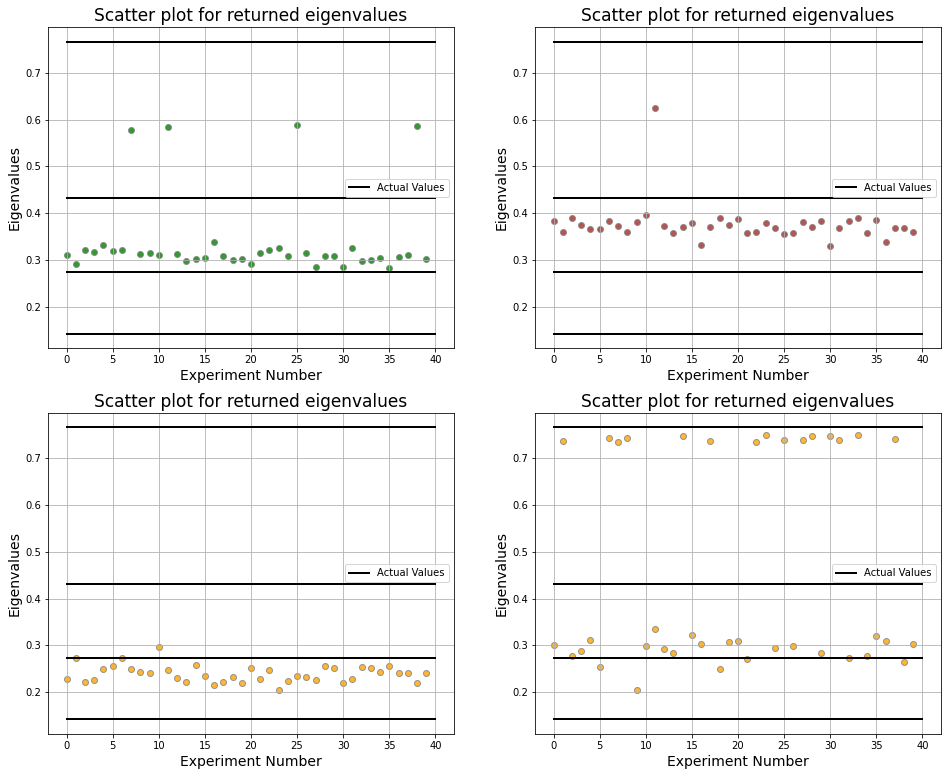

In [89]:
generate_plot2(eig_v, eig_ret, 4, 40)

In [90]:
eig_ret2 = []

spea2 = global_max_SPEA(unit, resolution=30, error=2, max_iters=10)
simulator = Aer.get_backend('qasm_simulator')

for i in range(4):
    basis_index = i
    eigen_vals_ret2 = []
    while len(eigen_vals_ret2) != 40:
        res = spea2.get_eigen_pair(
            backend=simulator, algo='alternate', basis=basis, basis_ind=basis_index)
        if res['cost'] < 0.75:
            continue
        print((len(eigen_vals_ret2)/40)*100, "% done...")
        eigen_vals_ret2.append(res['theta'])
    eig_ret2.append(eigen_vals_ret2)

Maximum iterations reached for the estimation.
Terminating algorithm...
0.0 % done...
Maximum iterations reached for the estimation.
Terminating algorithm...
2.5 % done...
Maximum iterations reached for the estimation.
Terminating algorithm...
5.0 % done...
Maximum iterations reached for the estimation.
Terminating algorithm...
Maximum iterations reached for the estimation.
Terminating algorithm...
7.5 % done...
Maximum iterations reached for the estimation.
Terminating algorithm...
10.0 % done...
Maximum iterations reached for the estimation.
Terminating algorithm...
Maximum iterations reached for the estimation.
Terminating algorithm...
12.5 % done...
Maximum iterations reached for the estimation.
Terminating algorithm...
15.0 % done...
Maximum iterations reached for the estimation.
Terminating algorithm...
Maximum iterations reached for the estimation.
Terminating algorithm...
17.5 % done...
Maximum iterations reached for the estimation.
Terminating algorithm...
Maximum iterations r

<ipython-input-70-77b4d686abd1>:7: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  ax = fig.add_subplot(size/2,2,i+1)


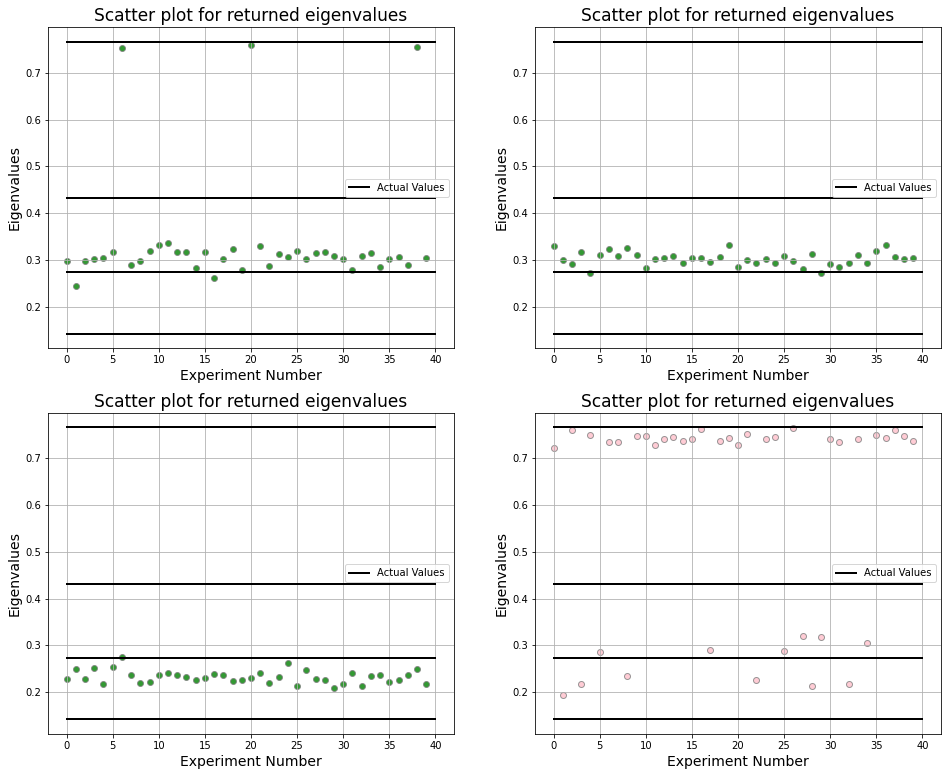

In [91]:
generate_plot2(eig_v, eig_ret2, 4, 40)

- **Distribution plots**
- These plots show us which eigenvalues our results are closest to

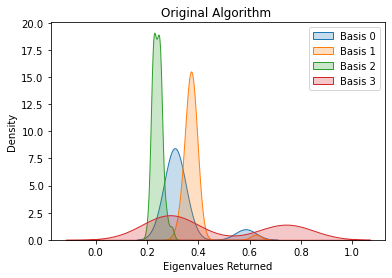

In [123]:
plt.title("Original Algorithm ")
for i in range(4):
    sns.kdeplot(eig_ret[i], shade=True, label='Basis '+str(i))
plt.xlabel("Eigenvalues Returned")
plt.legend()

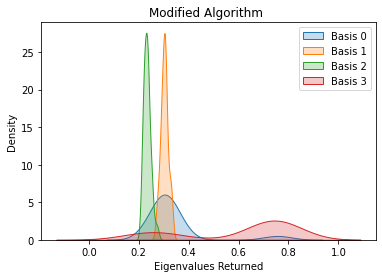

In [128]:
plt.title("Modified Algorithm ")
for i in range(4):
    sns.kdeplot(eig_ret2[i], shade=True, label='Basis '+str(i), palette='red')
plt.xlabel("Eigenvalues Returned")
plt.legend()

## Inference
- Now that we have done larger number of experiments, it seems to be that the basis states aren't very good in determining the min eigval region.
<font color = 'orange'>
- One inference that I got is that **if the basis state and the computational basis is specified as constant, the algorithm converges to the same eigenvalue every time**
</font>
<font color = 'green'>
- Next steps are to discover a **way to see if we can generate such basis states which are actually closer to the eigenvector associated with the minimum eigenvalue**
</font>




## Build Min Eigensolver
- Provide a step size to use
- Provide a minimum threshold to use
- If the threshold is met, we return the eigenvalues discovered, else we continue our search.
- Each step uses **experiments** number of experiments and tries to evaluate eigenvalues using the SPEA method

In [23]:
def min_eigensolver(unitary, algo, experiments=20, min_threshold=0.9):

    dims = unitary.shape[0]
    simulator = Aer.get_backend('qasm_simulator')
    step_size = (1/dims)

    # generate the steps
    steps = np.arange(0, 1 + 1e-12, step_size)
    if steps[-1] != 1:
        steps = np.append(steps, 1)
    print("Steps :", steps)
    if algo == 0:
        spe = SPEA(unitary, resolution=40, error=2, max_iters=12)
    else:
        spe = global_max_SPEA(unitary, resolution=40, error=2, max_iters=12)
    # start the experiments

    max_cost = -1
    for i in range(len(steps) - 1):
        left = steps[i]
        right = steps[i+1]
        costs, eigs = [], []  # lists to store costs
        for _ in range(experiments):
            res = spe.get_eigen_pair(
                backend=simulator, theta_left=left, theta_right=right,
                randomize=True)
            costs.append(res['cost'])
            eigs.append(res['theta'])

        if np.average(costs) > min_threshold:
            return (np.average(costs), eigs)
        if np.average(costs) > max_cost:
            max_cost = np.average(costs)
            best_eigs = eigs

    # return the cost with the max average cost
    return (max_cost, best_eigs)

In [24]:
unit = unitary_group.rvs(4)
unit 

array([[-0.73737466+0.08923416j, -0.50550121+0.22319599j,
         0.03327247+0.22981948j, -0.0337806 -0.29648402j],
       [ 0.18541684-0.3030763j , -0.21341786-0.12616057j,
         0.46067544-0.10833265j, -0.73096463-0.23245334j],
       [ 0.27560144+0.47868375j, -0.61297999-0.42258658j,
        -0.30588642+0.01230079j, -0.12700966+0.17530709j],
       [-0.10509646+0.0770823j , -0.01442761-0.28045742j,
         0.66131652+0.43710499j,  0.19036625+0.48939648j]])

In [25]:
# get the eigenvalues and eigenstates
eig_v, eig_vect = np.linalg.eig(unit)
eig_v = np.angle(eig_v)
eig = []
for k in eig_v:
    if k < 0:
        e = (k+2*np.pi)/(2*np.pi)
    else:
        e = (k)/(2*np.pi)
    eig.append(e)
eig_v = np.array(eig)
print("Eigenvalues :", eig_v)
print("Eigenstates :", eig_vect)

Eigenvalues : [0.14742747 0.33002076 0.53756144 0.7158465 ]
Eigenstates : [[ 0.01668685-0.25374176j  0.44439848+0.21364809j  0.82087212+0.j
  -0.1338175 -0.02151704j]
 [-0.45293829+0.13841667j  0.07336284-0.40803535j  0.22458654+0.36012688j
   0.65090883+0.j        ]
 [ 0.32728374-0.08557429j  0.61629812+0.j         -0.33045284-0.03627131j
   0.31056331-0.54660293j]
 [ 0.77239031+0.j         -0.0844143 -0.44501728j  0.18543275+0.03374137j
   0.18536906+0.35827584j]]


In [31]:
res1 = min_eigensolver(unit, algo=0, experiments=40, min_threshold=0.85)
res2 = min_eigensolver(unit, algo=1, experiments=40, min_threshold=0.85)

Steps : [0.   0.25 0.5  0.75 1.  ]
Maximum iterations reached for the estimation.
Terminating algorithm...
Maximum iterations reached for the estimation.
Terminating algorithm...
Maximum iterations reached for the estimation.
Terminating algorithm...
Maximum iterations reached for the estimation.
Terminating algorithm...
Maximum iterations reached for the estimation.
Terminating algorithm...
Maximum iterations reached for the estimation.
Terminating algorithm...
Maximum iterations reached for the estimation.
Terminating algorithm...
Maximum iterations reached for the estimation.
Terminating algorithm...
Maximum iterations reached for the estimation.
Terminating algorithm...
Maximum iterations reached for the estimation.
Terminating algorithm...
Maximum iterations reached for the estimation.
Terminating algorithm...
Maximum iterations reached for the estimation.
Terminating algorithm...
Maximum iterations reached for the estimation.
Terminating algorithm...
Maximum iterations reached fo

In [32]:
res1[1], res2[1]

([0.25,
  0.22265625,
  0.25,
  0.22189349112426035,
  0.25,
  0.24248798076923075,
  0.21465113412228798,
  0.25,
  0.25,
  0.1794781907462196,
  0.22559428418803418,
  0.25,
  0.25,
  0.2487479967948718,
  0.25,
  0.1959385016025641,
  0.2344802966798159,
  0.23432427781886916,
  0.25,
  0.21594551282051283,
  0.25,
  0.25,
  0.25,
  0.21937150723208415,
  0.2421647812041673,
  0.25,
  0.25,
  0.19025440705128205,
  0.25,
  0.25,
  0.25,
  0.25,
  0.18684895833333331,
  0.25,
  0.2318709935897436,
  0.21626653928336617,
  0.25,
  0.2288405037804076,
  0.25,
  0.19085151627218935],
 [0.19355207113432774,
  0.25,
  0.22859700520833334,
  0.25,
  0.25,
  0.25,
  0.25,
  0.18968811637080868,
  0.25,
  0.24102646252412802,
  0.25,
  0.18677704840565418,
  0.25,
  0.2270069611378205,
  0.25,
  0.24879807692307693,
  0.1905561348848493,
  0.1804637419871795,
  0.16168818828073636,
  0.25,
  0.25,
  0.2449637368507561,
  0.25,
  0.19606794008974515,
  0.2159765947672752,
  0.2395708133012820

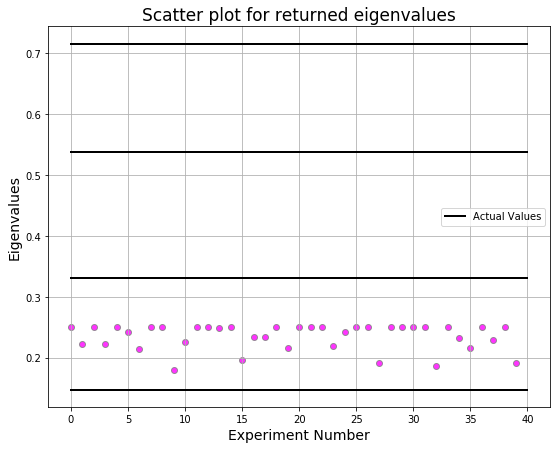

In [33]:
generate_plot1(eig_v,res1[1],40)

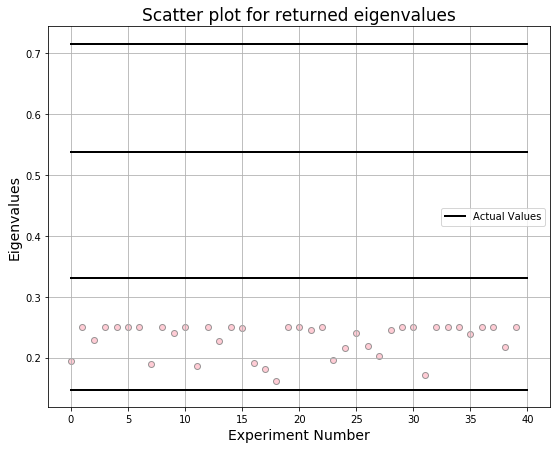

In [34]:
generate_plot1(eig_v,res2[1],40)